**Thinkful - 3.2.5 - Drill - Random Forests**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
%matplotlib inline

# Replace the path with the correct path for your data.
y2015 = pd.read_csv('data/LoanStats3d.csv',skipinitialspace=True,header=1)
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

# Drop other columns with many unique variables
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc', 'verification_status_joint',
           'policy_code'], 1,inplace=True)

# Create dataset for use in models
X = y2015.drop(['loan_status'], 1)
y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
X = X.drop('pymnt_plan_n',1)

In [7]:
rfc = ensemble.RandomForestClassifier()
score = cross_val_score(rfc, X, y, cv=10)
print(score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

[ 0.97530336  0.98026644  0.98152502  0.98164375  0.968891    0.97900736
  0.92771142  0.9808117   0.98005082  0.98047784]
Weighted Accuracy: 0.97 (+/- 0.03)


In [8]:
rfc_kbest = SelectKBest(k=80).fit(X,y)
X_new = rfc_kbest.transform(X)
cross_val_score(rfc, X_new, y, cv=10)
print(score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

[ 0.97530336  0.98026644  0.98152502  0.98164375  0.968891    0.97900736
  0.92771142  0.9808117   0.98005082  0.98047784]
Weighted Accuracy: 0.97 (+/- 0.03)


In [9]:
rfc_kbest = SelectKBest(k=20).fit(X,y)
X_new = rfc_kbest.transform(X)
cross_val_score(rfc, X_new, y, cv=10)
best = rfc_kbest.get_support(indices=True)
print(X.columns[best])
print(score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Index(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_pymnt_d_Aug-2016', 'last_pymnt_d_Dec-2016',
       'last_pymnt_d_Jan-2017', 'last_pymnt_d_Jul-2016',
       'last_pymnt_d_Jun-2016', 'last_pymnt_d_Nov-2016',
       'last_pymnt_d_Oct-2016', 'last_pymnt_d_Sep-2016',
       'next_pymnt_d_Feb-2017', 'last_credit_pull_d_Dec-2016',
       'last_credit_pull_d_Jan-2017', 'last_credit_pull_d_Oct-2016'],
      dtype='object')
[ 0.97530336  0.98026644  0.98152502  0.98164375  0.968891    0.97900736
  0.92771142  0.9808117   0.98005082  0.98047784]
Weighted Accuracy: 0.97 (+/- 0.03)


In [10]:
rfc_kbest = SelectKBest(k=10).fit(X,y)
X_new = rfc_kbest.transform(X)
cross_val_score(rfc, X_new, y, cv=10)
best = rfc_kbest.get_support(indices=True)
print(X.columns[best])
print(score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Index(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'collection_recovery_fee', 'last_pymnt_amnt',
       'last_pymnt_d_Jan-2017', 'next_pymnt_d_Feb-2017',
       'last_credit_pull_d_Jan-2017'],
      dtype='object')
[ 0.97530336  0.98026644  0.98152502  0.98164375  0.968891    0.97900736
  0.92771142  0.9808117   0.98005082  0.98047784]
Weighted Accuracy: 0.97 (+/- 0.03)


In [11]:
rfc_kbest = SelectKBest(k=5).fit(X,y)
X_new = rfc_kbest.transform(X)
cross_val_score(rfc, X_new, y, cv=10)
score = cross_val_score(rfc, X_new, y, cv=10)
best = rfc_kbest.get_support(indices=True)
print(X.columns[best])
print(score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Index(['out_prncp_inv', 'last_pymnt_amnt', 'last_pymnt_d_Jan-2017',
       'next_pymnt_d_Feb-2017', 'last_credit_pull_d_Jan-2017'],
      dtype='object')
[ 0.9273349   0.92548265  0.92875971  0.93892332  0.91177867  0.93315127
  0.92908879  0.93690185  0.9163797   0.9401273 ]
Weighted Accuracy: 0.93 (+/- 0.02)


In [12]:
rfc_kbest = SelectKBest(k=2).fit(X,y)
X_new = rfc_kbest.transform(X)
cross_val_score(rfc, X_new, y, cv=10)
score = cross_val_score(rfc, X_new, y, cv=10)
best = rfc_kbest.get_support(indices=True)
print(X.columns[best])
print(score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Index(['last_pymnt_d_Jan-2017', 'next_pymnt_d_Feb-2017'], dtype='object')
[ 0.87962765  0.86255373  0.85326874  0.88188359  0.85568749  0.86321539
  0.87159515  0.85706144  0.86888166  0.87210849]
Weighted Accuracy: 0.87 (+/- 0.02)


In [13]:
rfc_kbest = SelectKBest(k=4).fit(X,y)
X_new = rfc_kbest.transform(X)
cross_val_score(rfc, X_new, y, cv=10)
score = cross_val_score(rfc, X_new, y, cv=10)
best = rfc_kbest.get_support(indices=True)
print(X.columns[best])
print(score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Index(['last_pymnt_amnt', 'last_pymnt_d_Jan-2017', 'next_pymnt_d_Feb-2017',
       'last_credit_pull_d_Jan-2017'],
      dtype='object')
[ 0.91246943  0.9111871   0.91289687  0.9306357   0.91037758  0.91864165
  0.92310432  0.91484006  0.90934999  0.91276778]
Weighted Accuracy: 0.92 (+/- 0.01)


In [14]:
rfc_kbest = SelectKBest(k=3).fit(X,y)
X_new = rfc_kbest.transform(X)
cross_val_score(rfc, X_new, y, cv=10)
score = cross_val_score(rfc, X_new, y, cv=10)
best = rfc_kbest.get_support(indices=True)
print(X.columns[best])
print(score)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Index(['last_pymnt_amnt', 'last_pymnt_d_Jan-2017', 'next_pymnt_d_Feb-2017'], dtype='object')
[ 0.91192325  0.91109211  0.91085465  0.93284415  0.90767039  0.91728806
  0.92322306  0.91191907  0.90787755  0.91338527]
Weighted Accuracy: 0.91 (+/- 0.01)


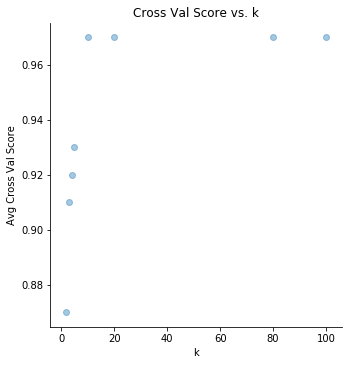

In [15]:
import seaborn as sns

df = pd.DataFrame()
df['Avg Cross Val Score'] = [0.97, 0.97, 0.97,0.97,0.93,0.87,0.92,0.91]
df['k'] = [100,80,20,10,5,2,4,3]
g = sns.lmplot(y='Avg Cross Val Score', x='k',data=df, fit_reg=False,scatter_kws={'alpha':0.4})
g.set_ylabels('Avg Cross Val Score')
g.set_xlabels('k')
plt.title('Cross Val Score vs. k')
plt.show()